In [34]:
# Libraries
import sys         # Biblioteca padrão do Python, usada para interagir com o sistema operacional e acessar funcionalidades relacionadas ao sistema.
import scipy       # Biblioteca científica em Python, usada para matemática, ciência e engenharia.
import numpy as np  # Biblioteca usada para computação numérica eficiente, especialmente para trabalhar com arrays e matrizes multidimensionais.
import matplotlib   # Biblioteca para criação de gráficos e visualizações em Python.
import pandas as pd  # Biblioteca para manipulação e análise de dados tabulares, como um DataFrame.
import sklearn      # Scikit-Learn, uma biblioteca para aprendizado de máquina e mineração de dados em Python.
import seaborn as sns # Biblioteca de visualização de dados baseada no matplotlib, fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.


In [35]:
# Load libraries
from pandas.plotting import scatter_matrix  # Usada para criar gráficos de matriz de dispersão para visualizar relações entre variáveis em um DataFrame do Pandas.
from matplotlib import pyplot as plt          # Usada para criar gráficos e visualizações em Python, especialmente para plotar gráficos criados com o Matplotlib.
from sklearn import model_selection           # Biblioteca para dividir conjuntos de dados em treinamento e teste, realizar validação cruzada, etc.
from sklearn.metrics import classification_report  # Usada para gerar relatórios de classificação, incluindo métricas de desempenho para algoritmos de classificação.
from sklearn.metrics import confusion_matrix     # Usada para calcular e exibir matrizes de confusão para avaliar o desempenho de modelos de classificação.
from sklearn.metrics import accuracy_score       # Usada para calcular a precisão (accuracy) de um modelo de classificação.
from sklearn.model_selection import KFold, cross_val_score # Usada para dividir conjuntos de dados em treinamento e teste, realizar validação cruzada, etc.
from sklearn.linear_model import LogisticRegression  # Implementação de regressão logística em Scikit-Learn, comumente usada para classificação.
from sklearn.tree import DecisionTreeClassifier     # Implementação de árvores de decisão em Scikit-Learn, usada para tarefas de classificação.
from sklearn.neighbors import KNeighborsClassifier  # Implementação do algoritmo k-vizinhos mais próximos em Scikit-Learn para classificação.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Usado para análise discriminante linear em Scikit-Learn, útil para redução de dimensionalidade e classificação.
from sklearn.naive_bayes import GaussianNB         # Implementação do classificador Naive Bayes Gaussiano em Scikit-Learn.
from sklearn.svm import SVC                       # Implementação de máquinas de vetores de suporte (SVM) em Scikit-Learn, usadas para classificação e regressão.
from sklearn import datasets                      # Usada para carregar conjuntos de dados de exemplo disponíveis no Scikit-Learn.


# Carregando o Conjunto de Dados

In [36]:
# Load dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])  # Cria um DataFrame do Pandas com os dados do conjunto de dados "iris", usando os nomes das colunas do conjunto de dados como nomes de coluna no DataFrame.


# Dimensões do Dataset

In [37]:
# Shape
iris_df.shape  # Exibe o número de linhas e colunas do DataFrame.

(150, 4)

# Analise os dados

In [38]:
# Head
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
# Info
iris_df.info()  # Exibe informações sobre o DataFrame, incluindo o tipo de dados de cada coluna, se há valores nulos, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Resumo estatístico

In [40]:
# Descriptions
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
iris_df.mode()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,3.0,1.4,0.2
1,NaN,NaN,1.5,NaN


In [42]:
iris_df.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

<Axes: >

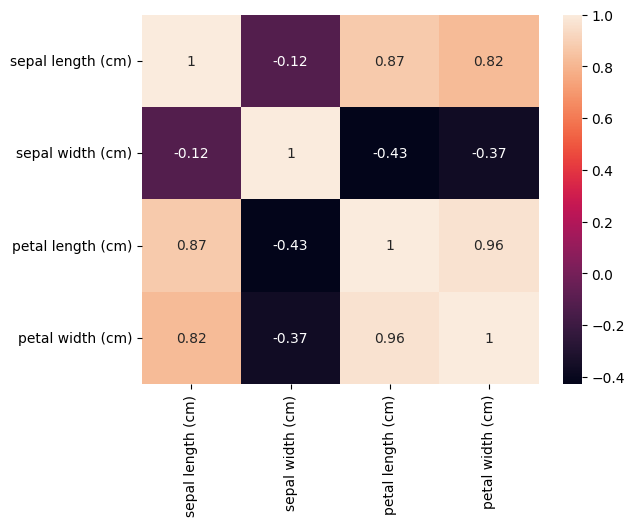

In [43]:
sns.heatmap(iris_df.corr(), annot=True)

# Distribuição de Classes

In [44]:
# Class distribution
iris_df.groupby('petal length (cm)').size()  # Exibe o número de instâncias (linhas) que pertencem a cada classe.

petal length (cm)
1.0     1
1.1     1
1.2     2
1.3     7
1.4    13
1.5    13
1.6     7
1.7     4
1.9     2
3.0     1
3.3     2
3.5     2
3.6     1
3.7     1
3.8     1
3.9     3
4.0     5
4.1     3
4.2     4
4.3     2
4.4     4
4.5     8
4.6     3
4.7     5
4.8     4
4.9     5
5.0     4
5.1     8
5.2     2
5.3     2
5.4     2
5.5     3
5.6     6
5.7     3
5.8     3
5.9     2
6.0     2
6.1     3
6.3     1
6.4     1
6.6     1
6.7     2
6.9     1
dtype: int64

# Distribuição de Classe

## Gráficos Univariados

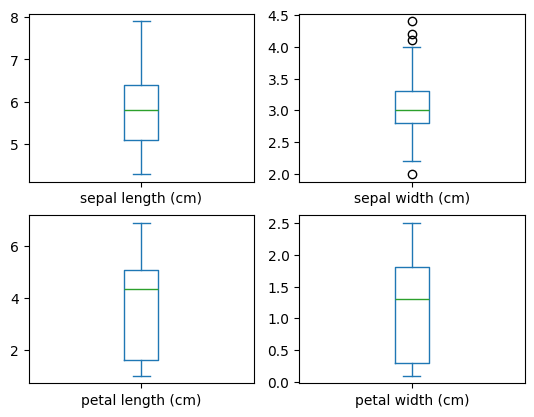

In [45]:
# Box and whisker plots

iris_df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)  # Cria um gráfico de caixa e bigodes para cada variável numérica do conjunto de dados.
plt.show()  # Exibe o gráfico de caixa e bigodes.

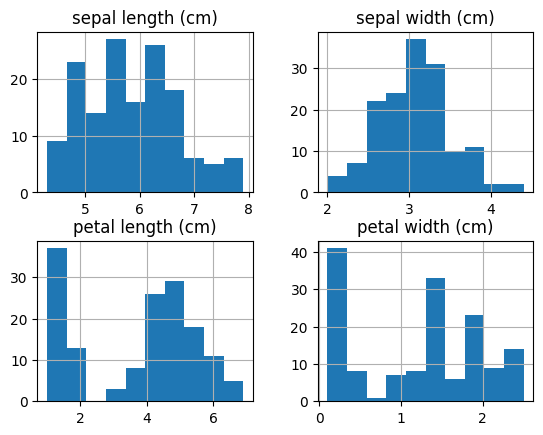

In [46]:
# Histograms
iris_df.hist()  # Cria um histograma para cada variável numérica do conjunto de dados.
plt.show()  # Exibe os histogramas.

# Gráficos Multivariados

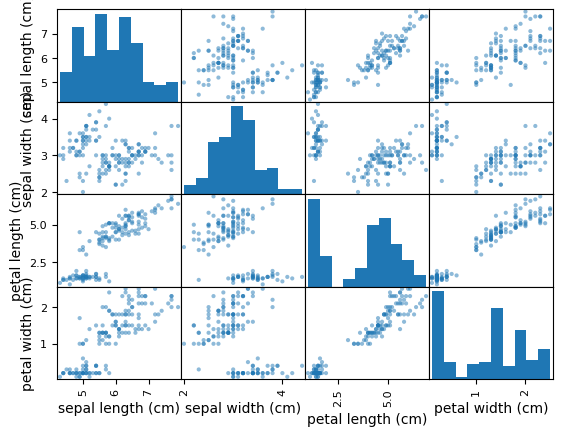

In [47]:
# Scatter plot matrix
scatter_matrix(iris_df)  # Cria um gráfico de matriz de dispersão para cada variável numérica do conjunto de dados.
plt.show()  # Exibe o gráfico de matriz de dispersão.

# Avaliando Algoritmos

## Criar um conjunto de dados de validação

In [48]:
# Split-out validation dataset
array = iris_df.values  # Converte o DataFrame do Pandas em um array NumPy.
X = array[:,0:3]  # Cria um array com os valores das colunas 0 a 3 do array NumPy.
Y = array[:,3]  # Cria um array com os valores da coluna 4 do array NumPy.
validation_size = 0.20  # Define a proporção do conjunto de dados que será usado para validação.
seed = 7  # Define uma semente para o gerador de números aleatórios.
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)  # Divide o conjunto de dados em treinamento e teste.

In [56]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_validation = encoder.transform(Y_validation)

## Test Harness

In [57]:
# Test options and evaluation metric
seed = 7  # Define uma semente para o gerador de números aleatórios.
scoring = 'accuracy'  # Define a métrica de avaliação dos modelos de classificação.
#kfold = KFold(n_splits=10, random_state=seed,shuffle=True)  # Define o número de folds para a validação cruzada.

## Construir Modelos


In [64]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.266667 (0.097183)
LDA: 0.333333 (0.117851)
KNN: 0.308333 (0.112114)
CART: 0.208333 (0.140683)
NB: 0.300000 (0.124722)
SVM: 0.308333 (0.153885)


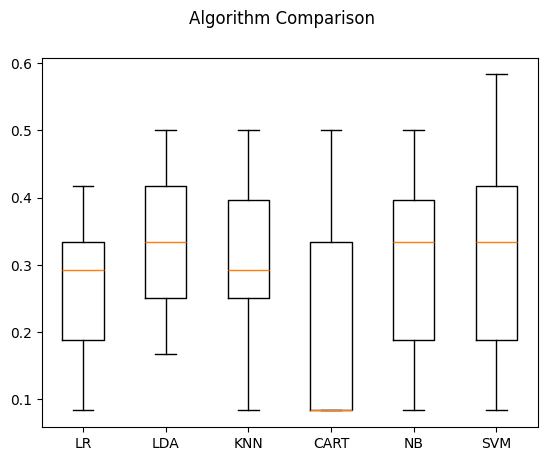

In [59]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [60]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.03333333333333333
[[1 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 7 1 2 1 3 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
      

C:\Users\jaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMet